<a href="https://colab.research.google.com/github/cpappas18/articulaite/blob/main/project_journal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the dataset

We aggregated a few datasets found online into a dataset for **Parkinsons** and a dataset for **Parkinsons, ALS, and cerebral palsy**. We cleaned them and ended up with 2 versions of each : one with the NaN rows **removed**, and one where we replaced them with the **medians**. 

Let's explore the **3disorder_NaN_replaced_by_median** dataset :

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/all_disorders_median_std_onehot.csv')
df = df.iloc[:, 1:]

# taking a peek
df.head()

,Control,Parkinsons,ALS,Cerebral_palsy,Gender,MDVP:Jitter(%),MDVP:Jitter(Abs),Jitter:PPQ5,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,DFA
0,0,1,0,0,0.0,0.037775,0.000503,-0.011752,0.051462,0.098145,0.313568,0.047848,0.149447,-0.102311,1.560809
1,0,1,0,0,0.0,0.069989,0.000679,-0.011752,0.100932,0.372398,1.049795,0.209514,0.380995,-0.102311,1.602059
2,0,1,0,0,0.0,0.084345,0.000855,-0.011752,0.142417,0.231999,0.519712,0.145493,0.270893,-0.102311,1.658218
3,0,1,0,0,0.0,0.075066,0.000855,-0.011752,0.120199,0.272358,0.648551,0.173852,0.295415,-0.102311,1.599274
4,0,1,0,0,0.0,0.125313,0.001207,-0.011752,0.200219,0.417743,0.895187,0.269969,0.432209,-0.102311,1.640651


In [67]:
# 11 features
features = list(df.columns[4:])
features

['Gender',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'DFA']

In [68]:
# 4 classes
classes = list(df.columns[:4])
classes

['Control', 'Parkinsons', 'ALS', 'Cerebral_palsy']

In [69]:
# number of recordings for PD, CP, ALS and healthy controls
parkinsons = df[df['Parkinsons']==1].reset_index().iloc[:, 1:]
cerebral = df[df['Cerebral_palsy']==1].reset_index().iloc[:, 1:]
als = df[df['ALS']==1].reset_index().iloc[:, 1:]
healthy = df[df['Control']==1].reset_index().iloc[:, 1:]

print(parkinsons.shape[0], cerebral.shape[0], als.shape[0], healthy.shape[0])

6706 13 15 385


In [71]:
# add a few boxplots here
# fig, ax = plt.subplots(2,3,figsize=(16,8))
# ax.boxplot(parkinsons['MDVP:Jitter(%)'])

Text(0.5, 1.0, "Correlation map of Parkinson's features")

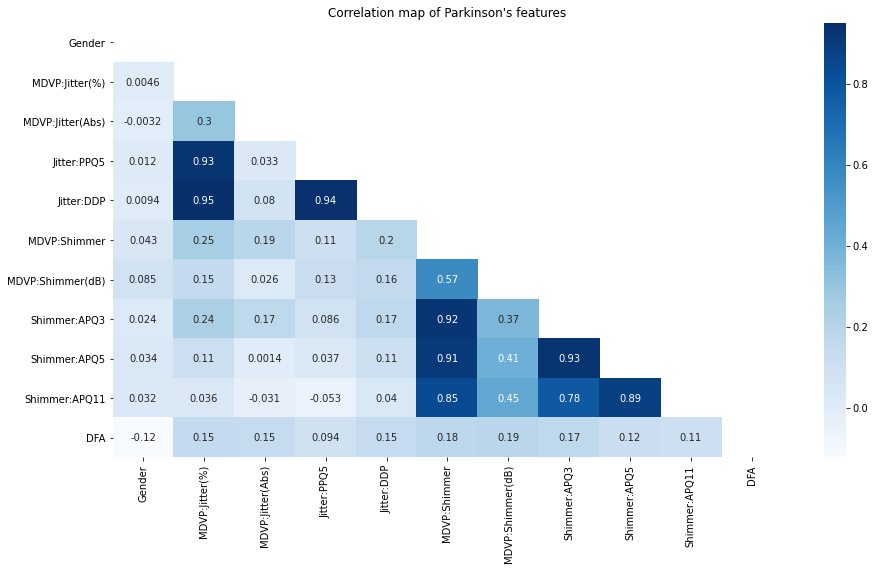

In [72]:
# correlation heatmap
plt.figure(figsize=(15, 8))
matrix = np.triu(df[features].corr())
sns.heatmap(df[features].corr(), annot = True, cmap='Blues', mask=matrix)
plt.title('Correlation map of Parkinson\'s features')

# Picking a model

We trained several machine learning models on 8 versions of our dataset:

1.   PD and Healthy only **vs** PD, ALS, Cerebral palsy and Healthy
2.   NaN removed **vs** NaN replaced by median
3.   SMOTE-augmented version **vs** non-augmented

We settled on a random forest model since it had pretty good accuracy (97%) and recall (98%) while still having pretty low false negatives (8).




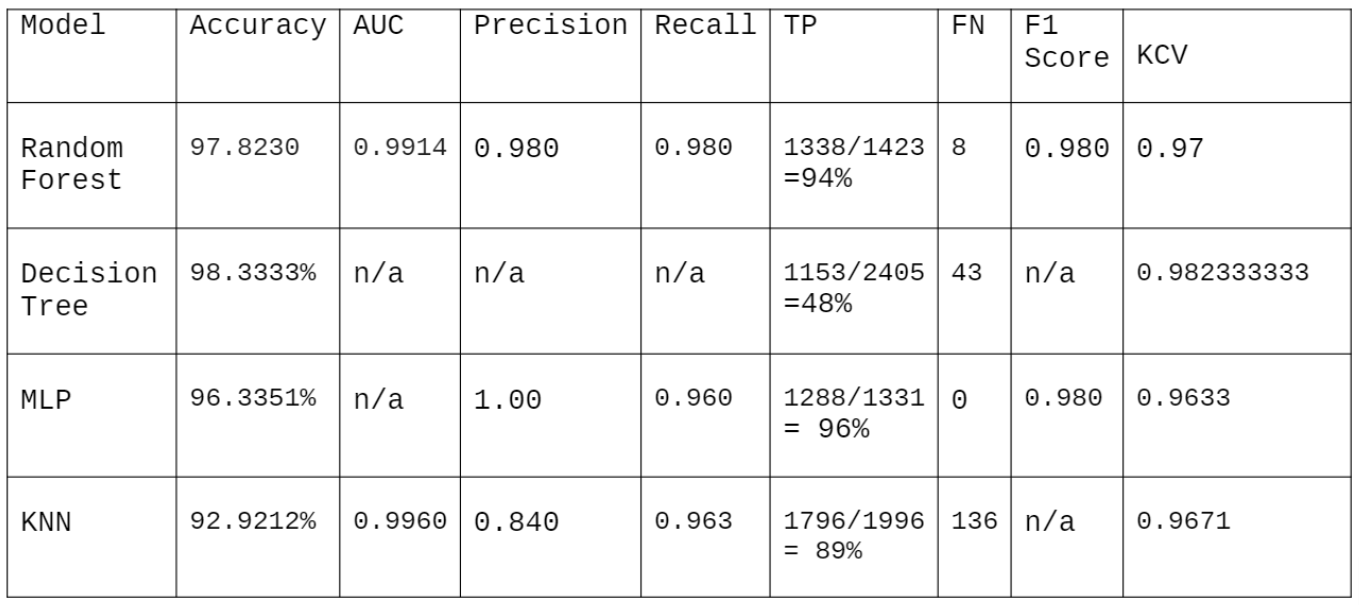